<center>

##  Final Project - Machine Learning with Python





### Problem Statement:

Create a machine learning model which will help the company in determining the salary of newly
hired employees using the given data.

### Importing Data

In [245]:
#Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [246]:
#Importing the data from 'ML Case Study' CSV file

df = pd.read_csv('C:/Users/Arjun kumar/Downloads/ML case Study.csv', header = 0)

In [247]:
#Top 5 rows
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [248]:
import warnings

# Filter out warning messages
warnings.filterwarnings('ignore')


### Preprocessing Stage

In [249]:
#Checking if there are any missing values in the provided data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


#### The above 'df.info' statement shows that there are no missing values found in the provided data, thus missing value(s) imputaion not needed, in this case. 

In [250]:
#Descriptive Statistics of dataframe
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [251]:
#Shape of dataframe
df.shape

(1589, 8)

#### We have used the 'df.describe' statement to find out the descriptive statistics for our DataFrame and as per this information, it doesn't seem like that we have outliers present in the provided data. However to make sure that we have no outliers in the provided data, we have plotted a jointplot for dependent variable "CTC" and each of the independemt quantitative variables, we have.

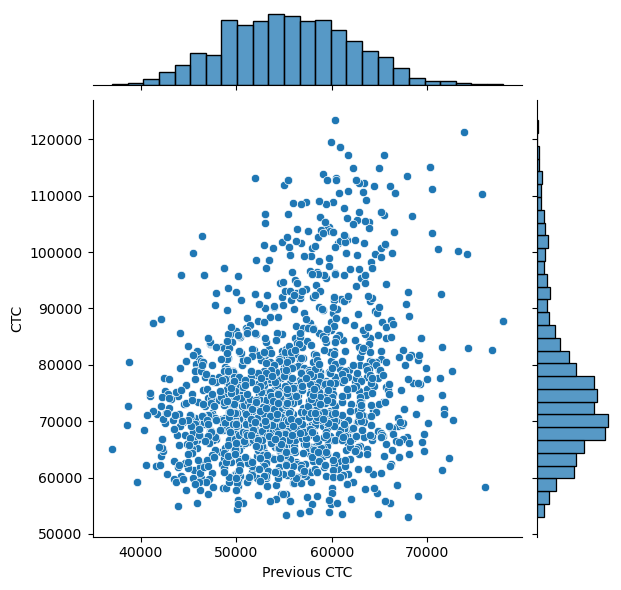

In [252]:
#Joint plot between "Previous CTC" and "CTC"

sns.jointplot(x="Previous CTC", y="CTC", data=df)

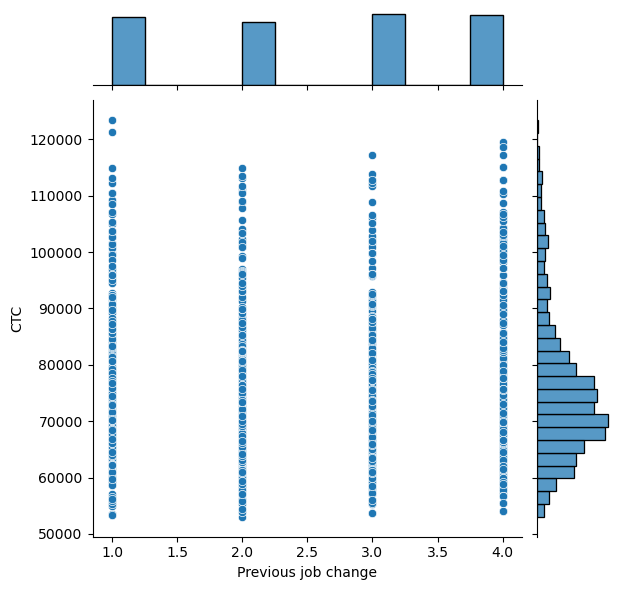

In [253]:
#Joint plot between "Previous job change" and "CTC"

sns.jointplot(x="Previous job change", y="CTC", data=df)

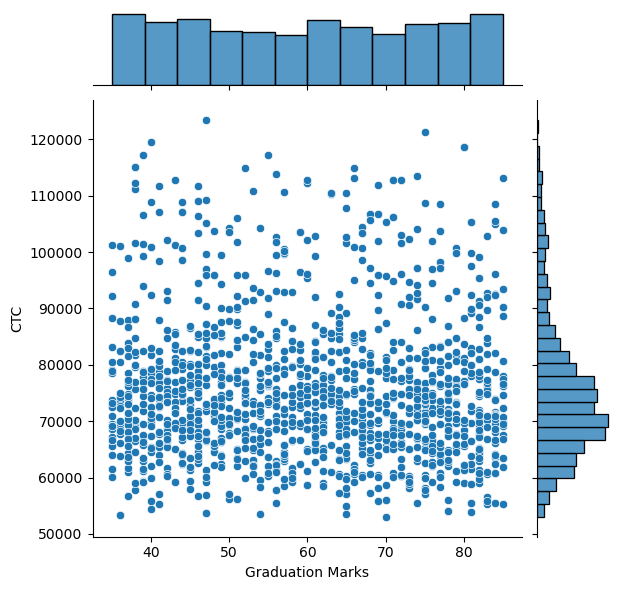

In [254]:
#Joint plot between "Graduation Marks" and "CTC"

sns.jointplot(x="Graduation Marks", y="CTC", data=df)

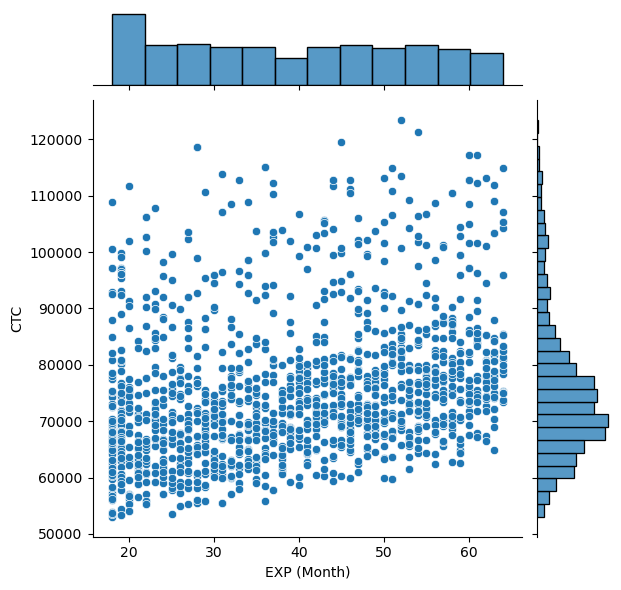

In [255]:
#Joint plot between "EXP (Month)" and "CTC"

sns.jointplot(x="EXP (Month)", y="CTC", data=df)

In [256]:
#Importing the data from 'Colleges' CSV file
df1 = pd.read_csv('C:/Users/Arjun kumar/Downloads/Colleges.csv', header = 0)

In [257]:
#Top 5 rows
df1.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


##### We have colleges list divided into 3 columns namely Tier1, Tier2 and Tier3 in the "Colleges" csv file.

##### Using the "Colleges" csv file, we have created a list for each column namely  Tier1, Tier2 and Tier3.

In [258]:
Tier1 = df1["Tier 1"].tolist()
Tier2 = df1["Tier 2"].tolist()
Tier3 = df1["Tier 3"].tolist()

In [259]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

##### There are nan/null values present in these 3 lists.

##### We have removed the  nan/null values from all these 3 lists.

In [260]:
Tier1= [item for item in Tier1 if not pd.isnull(item)]
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad']

In [261]:
Tier2= [item for item in Tier2 if not pd.isnull(item)]
Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [262]:
Tier3= [item for item in Tier3 if not pd.isnull(item)]
Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune']

In [263]:
#Importing the data from 'Cities' CSV file
df2 = pd.read_csv('C:/Users/Arjun kumar/Downloads/cities.csv', header = 0)

In [264]:
#Top 5 rows
df2.head()

,Metro City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


##### We have cities list divided into 2 columns namely Metro City and non-metro cities in the "Cities" csv file.

##### Using the "Cities" csv file, we have created a list for each column namely  Metro City and non-metro cities.

In [265]:
met_city = df2["Metro City"].tolist()
non_met_city = df2["non-metro cities"].tolist()

In [266]:
met_city

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [267]:
non_met_city

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer',
 nan]

##### We have removed the nan/null values from non_met_city list.

In [268]:
non_met_city= [item for item in non_met_city if not pd.isnull(item)]
non_met_city

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer']

<Axes: xlabel='Role', ylabel='count'>

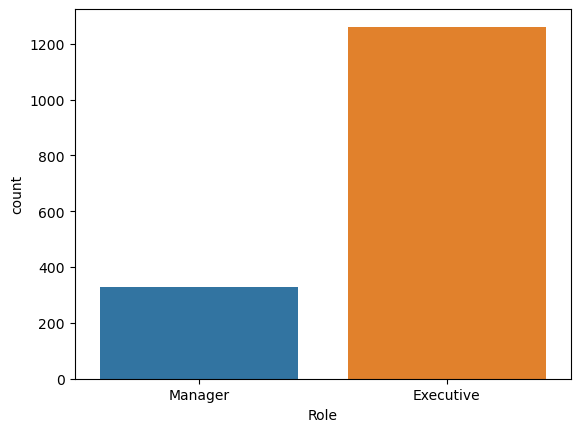

In [269]:
#Countplot for "Role" column of the data df.
sns.countplot(x="Role", data =df)

#### Importing Dummies

In [270]:
df = pd.get_dummies(df,columns = ["Role"], drop_first = True)

In [271]:
df[['Role_Manager']] = df[['Role_Manager']].astype(int)

In [272]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,1
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,0
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,0
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,0
4,DTU,Durgapur,57879.0,4,74,32,73878.10,0


##### Replacing College names with dummy variables.

In [273]:
for item in df["College"]:
    if item in Tier1:
        df["College"].replace(item, 1, inplace=True)
    elif item in Tier2:
        df["College"].replace(item, 2, inplace=True)
    elif item in Tier3:
        df["College"].replace(item, 3, inplace=True)


In [274]:
#Top 5 rows
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,Asansol,55523.0,3,66,19,71406.58,1
1,2,Ajmer,57081.0,1,84,18,68005.87,0
2,3,Rajpur Sonarpur,60347.0,2,52,28,76764.02,0
3,3,Ajmer,49010.0,2,81,33,82092.39,0
4,1,Durgapur,57879.0,4,74,32,73878.10,0


##### Replacing Cities name with dummy variables.

In [275]:
for item in df["City"]:
    if item in met_city:
        df["City"].replace(item, 1, inplace=True)
    elif item in non_met_city:
        df["City"].replace(item, 2, inplace=True)


In [276]:
#Top 5 rows
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,2,55523.0,3,66,19,71406.58,1
1,2,2,57081.0,1,84,18,68005.87,0
2,3,2,60347.0,2,52,28,76764.02,0
3,3,2,49010.0,2,81,33,82092.39,0
4,1,2,57879.0,4,74,32,73878.10,0


#### Corelation Analysis

In [277]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,0.014946,1.000000,-0.004644,-0.051670,0.018616,0.023613,0.020365,0.048671
Previous CTC,0.041979,-0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,-0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


## Linear Regression

#### OLS (Ordinary Least Squares) Method

In [278]:
import statsmodels.api as sn

In [279]:
X = sn.add_constant(df['College'])

In [280]:
lm = sn.OLS(df['CTC'],X).fit()

In [281]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.391
Date:                Thu, 28 Mar 2024   Prob (F-statistic):              0.238
Time:                        00:21:45   Log-Likelihood:                -17254.
No. Observations:                1589   AIC:                         3.451e+04
Df Residuals:                    1587   BIC:                         3.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.623e+04    808.431     94.295      0.000    7.46e+04    7.78e+04
College     -444.3117    376.737     -1.179      0.238   -1183.266     294.643
==============================================================================
Omnibus:                      251.462   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.543
Skew:                           1.086   Prob(JB):                     1.57e-85
Kurtosis:                       4.085   Cond. No.                         6.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
from sklearn.linear_model import LinearRegression

In [283]:
y = df['College']

In [284]:
X = df[["CTC"]]

In [285]:
lm2 = LinearRegression()

In [286]:
lm2.fit(X,y)

LinearRegression()

In [287]:
print(lm2.intercept_, lm2.coef_)

2.123966323228695 [-1.97085069e-06]


In [288]:
lm2.predict(X)

array([1.98323462, 1.98993691, 1.9726759 , ..., 1.98563982, 1.97931753,
       1.9858958 ])

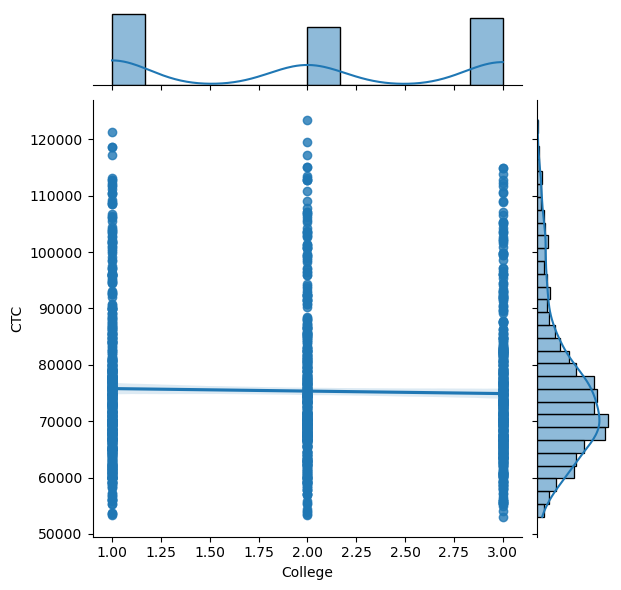

In [289]:
sns.jointplot(x=df['College'], y= df['CTC'], data = df, kind = 'reg')

In [290]:
X_multi = df.drop("CTC", axis = 1)

In [291]:
X_multi.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,2,55523.0,3,66,19,1
1,2,2,57081.0,1,84,18,0
2,3,2,60347.0,2,52,28,0
3,3,2,49010.0,2,81,33,0
4,1,2,57879.0,4,74,32,0


In [292]:
y_multi=df['CTC']

In [293]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [294]:
X_multi_cons= sn.add_constant(X_multi)

In [295]:
X_multi_cons.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,1.0,2,2,55523.0,3,66,19,1
1,1.0,2,2,57081.0,1,84,18,0
2,1.0,3,2,60347.0,2,52,28,0
3,1.0,3,2,49010.0,2,81,33,0
4,1.0,1,2,57879.0,4,74,32,0


In [296]:
np_data = np.asarray(df)

In [297]:
y_multi = y_multi.astype(float)
X_multi_cons = X_multi_cons.astype(float)

In [298]:
y_multi_array = np.asarray(y_multi)
X_multi_cons_array = np.asarray(X_multi_cons)

In [299]:
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

In [300]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Thu, 28 Mar 2024   Prob (F-statistic):          4.70e-257
Time:                        00:21:46   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.918e+04   2271.950     17.246      0.000    3.47e+04    4.36e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                 -380.8308    433.455     -0.879      0.380   -1231.039     469.377
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [301]:
lm3 = LinearRegression()

In [302]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [303]:
print(lm3.intercept_,lm3.coef_)

39182.77138056433 [-4.81514705e+02 -3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02  1.94874279e+04]


#### Train-Test Split

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 0)

In [306]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [307]:
lm_a = LinearRegression()

In [308]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [309]:
y_test_a = lm_a.predict(X_test)

In [310]:
y_train_a = lm_a.predict(X_train)

In [311]:
from sklearn.metrics import r2_score

In [312]:
r2_score(y_test, y_test_a)

0.5355989894790043

In [313]:
r2_score(y_train, y_train_a)

0.5331293335456955

### Ridge Method

In [314]:
from sklearn import preprocessing

In [315]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [316]:
X_train_s = scaler.transform(X_train)

In [317]:
X_test_s = scaler.transform(X_test)

In [318]:
from sklearn.linear_model import Ridge

In [319]:
lm_r = Ridge(alpha = 0.5)
lm_r.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [320]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5355848845406523

In [321]:
from sklearn.model_selection import validation_curve

In [322]:
param_range = np.logspace(-2,8,100)

In [323]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [324]:
train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

In [325]:
print(train_scores)
print(test_scores)

[[5.26336205e-01 5.33395314e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395314e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395314e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395313e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395313e-01 5.39739989e-01 5.37993451e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395313e-01 5.39739989e-01 5.37993451e-01
  5.30456030e-01]
 [5.26336204e-01 5.33395313e-01 5.39739988e-01 5.37993451e-01
  5.30456030e-01]
 [5.26336204e-01 5.33395312e-01 5.39739988e-01 5.37993450e-01
  5.30456030e-01]
 [5.26336203e-01 5.33395312e-01 5.39739987e-01 5.37993450e-01
  5.30456029e-01]
 [5.26336202e-01 5.33395311e-01 5.39739986e-01 5.37993448e-01
  5.30456028e-01]
 [5.26336200e-01 5.33395309e-01 5.39739984e-01 5.37993446e-01
  5.30456026e-01]
 [5.26336197e-01 5.33395306e-01 5.39739981e-01 5.37993443e-01
  5.30456022e-01]
 [5.26336192e-01 5.33395301e-01 5.397399

In [326]:
train_mean = np.mean(train_scores, axis = 1)

In [327]:
test_mean = np.mean(test_scores, axis = 1)

In [328]:
train_mean

array([5.33584198e-01, 5.33584198e-01, 5.33584198e-01, 5.33584198e-01,
       5.33584198e-01, 5.33584198e-01, 5.33584197e-01, 5.33584197e-01,
       5.33584196e-01, 5.33584195e-01, 5.33584193e-01, 5.33584190e-01,
       5.33584185e-01, 5.33584178e-01, 5.33584165e-01, 5.33584146e-01,
       5.33584115e-01, 5.33584066e-01, 5.33583988e-01, 5.33583864e-01,
       5.33583666e-01, 5.33583351e-01, 5.33582850e-01, 5.33582053e-01,
       5.33580786e-01, 5.33578772e-01, 5.33575572e-01, 5.33570492e-01,
       5.33562433e-01, 5.33549660e-01, 5.33529437e-01, 5.33497470e-01,
       5.33447031e-01, 5.33367635e-01, 5.33243023e-01, 5.33048161e-01,
       5.32744836e-01, 5.32275351e-01, 5.31553770e-01, 5.30454272e-01,
       5.28796554e-01, 5.26329100e-01, 5.22712731e-01, 5.17509194e-01,
       5.10182354e-01, 5.00121639e-01, 4.86696824e-01, 4.69347565e-01,
       4.47699366e-01, 4.21682378e-01, 3.91617638e-01, 3.58236040e-01,
       3.22612701e-01, 2.86027917e-01, 2.49791646e-01, 2.15078350e-01,
      

In [329]:
test_mean

array([ 5.25818549e-01,  5.25818561e-01,  5.25818577e-01,  5.25818596e-01,
        5.25818620e-01,  5.25818650e-01,  5.25818689e-01,  5.25818737e-01,
        5.25818798e-01,  5.25818874e-01,  5.25818970e-01,  5.25819091e-01,
        5.25819242e-01,  5.25819432e-01,  5.25819668e-01,  5.25819962e-01,
        5.25820326e-01,  5.25820775e-01,  5.25821325e-01,  5.25821993e-01,
        5.25822794e-01,  5.25823738e-01,  5.25824823e-01,  5.25826023e-01,
        5.25827270e-01,  5.25828418e-01,  5.25829193e-01,  5.25829103e-01,
        5.25827300e-01,  5.25822357e-01,  5.25811916e-01,  5.25792135e-01,
        5.25756827e-01,  5.25696140e-01,  5.25594541e-01,  5.25427798e-01,
        5.25158547e-01,  5.24729925e-01,  5.24056710e-01,  5.23013534e-01,
        5.21420069e-01,  5.19024060e-01,  5.15484605e-01,  5.10360541e-01,
        5.03111580e-01,  4.93121976e-01,  4.79755861e-01,  4.62447673e-01,
        4.40819169e-01,  4.14799113e-01,  3.84709917e-01,  3.51286334e-01,
        3.15608945e-01,  

In [330]:
max(test_mean)

0.5258291929838951

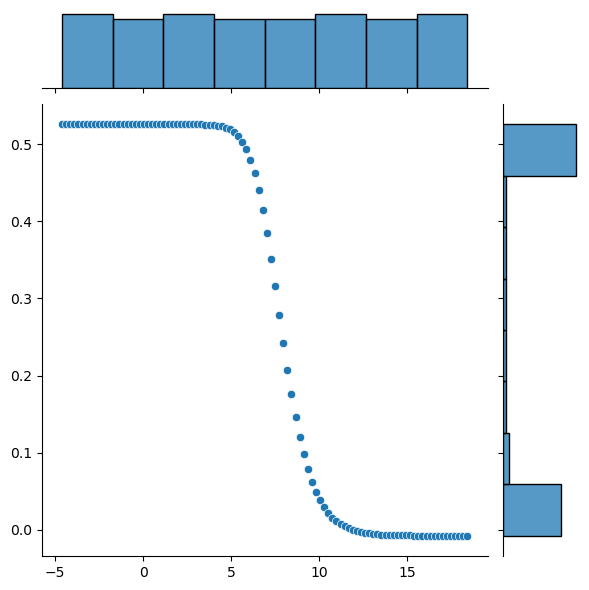

In [331]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [332]:
np.where(test_mean==max(test_mean))

(array([26], dtype=int64),)

In [333]:
param_range[26]

4.229242874389499

In [334]:
lm_r_best = Ridge(alpha = param_range[26])

In [335]:
lm_r_best.fit(X_train_s, y_train)

Ridge(alpha=4.229242874389499)

In [336]:
r2_score(y_test, lm_r_best.predict(X_test_s))

0.535475412672408

In [337]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.5331238227310131

### Lasso Method

In [338]:
from sklearn.linear_model import Lasso

In [339]:
lm_l = Lasso(alpha = 0.4)
lm_l.fit(X_train_s, y_train)

Lasso(alpha=0.4)

In [340]:
r2_score(y_test, lm_l.predict(X_test_s))

0.5356042489636199

In [341]:
train_scores, test_scores = validation_curve(Lasso(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

In [342]:
print(train_scores)
print(test_scores)

[[0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.52633621 0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973999 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973998 0.53799345 0.53045603]
 [0.5263362  0.53339531 0.53973998 0.53799344 0.53045602]
 [0.52633619 0

In [343]:
train_mean = np.mean(train_scores, axis = 1)

In [344]:
test_mean = np.mean(test_scores, axis = 1)

In [345]:
train_mean

array([0.5335842 , 0.5335842 , 0.5335842 , 0.5335842 , 0.5335842 ,
       0.5335842 , 0.5335842 , 0.5335842 , 0.5335842 , 0.5335842 ,
       0.5335842 , 0.5335842 , 0.5335842 , 0.5335842 , 0.5335842 ,
       0.53358419, 0.53358419, 0.53358419, 0.53358418, 0.53358417,
       0.53358415, 0.53358412, 0.53358408, 0.53358401, 0.5335839 ,
       0.53358373, 0.53358345, 0.533583  , 0.53358229, 0.53358116,
       0.53357936, 0.53357649, 0.53357193, 0.53356486, 0.53355367,
       0.5335363 , 0.53350867, 0.53346468, 0.53339487, 0.53328788,
       0.53312177, 0.53287261, 0.53248778, 0.53192325, 0.53108545,
       0.52990918, 0.52819818, 0.5256632 , 0.52245597, 0.51744466,
       0.50946523, 0.49675975, 0.47652898, 0.44431586, 0.39302354,
       0.31754415, 0.25034069, 0.17442286, 0.05354021, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [346]:
max(test_mean)

0.5258340188547592

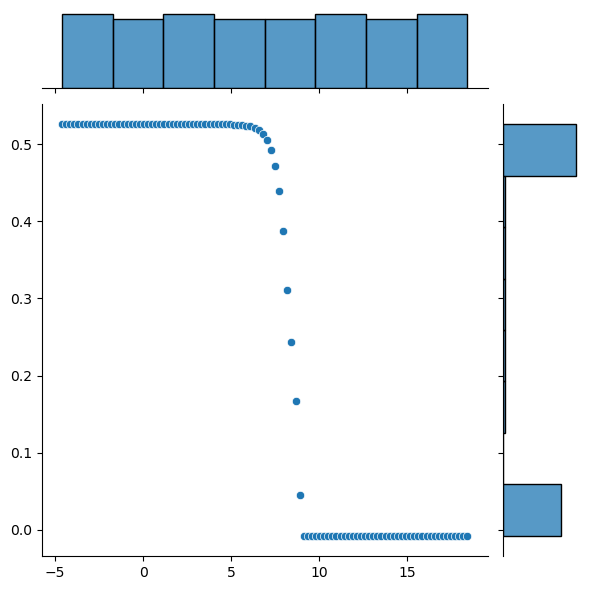

In [347]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [348]:
np.where(test_mean==max(test_mean))

(array([36], dtype=int64),)

In [349]:
param_range[36]

43.28761281083057

In [350]:
lm_l_best = Lasso(alpha = param_range[36])

In [351]:
lm_l_best.fit(X_train_s, y_train)

Lasso(alpha=43.28761281083057)

In [352]:
r2_score(y_test, lm_l_best.predict(X_test_s))

0.5360908337999819

In [353]:
r2_score(y_train, lm_l_best.predict(X_train_s))

0.5330506384208464

### Decision Trees Method

In [354]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [355]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [356]:
y_train_pred = regtree.predict(X_train)
y_test_pred =  regtree.predict(X_test)

In [357]:
y_test_pred

array([ 73242.49487805,  67137.92249315,  67137.92249315,  77249.90582677,
        73242.49487805,  87264.44514286,  70080.03361607,  73242.49487805,
        67137.92249315,  73242.49487805,  70080.03361607,  77249.90582677,
        95311.75026316,  77249.90582677,  73242.49487805, 104985.9661039 ,
        67137.92249315,  67137.92249315,  67137.92249315,  77249.90582677,
       104985.9661039 , 104985.9661039 ,  67137.92249315,  67137.92249315,
        70080.03361607,  67137.92249315,  77249.90582677, 104985.9661039 ,
        77249.90582677,  73242.49487805,  67137.92249315,  67137.92249315,
        77180.13443038,  77249.90582677, 104985.9661039 ,  77249.90582677,
        67137.92249315,  77180.13443038,  67137.92249315,  67137.92249315,
        67137.92249315,  77180.13443038,  73242.49487805,  67137.92249315,
        77249.90582677,  70080.03361607,  77180.13443038,  67137.92249315,
        67137.92249315,  73242.49487805,  95311.75026316,  77249.90582677,
       104985.9661039 ,  

In [358]:
from sklearn.metrics import mean_squared_error, r2_score

In [359]:
mean_squared_error(y_test, y_test_pred)

60424631.02613475

In [360]:
r2_score(y_train, y_train_pred)

0.6137194061789908

In [361]:
r2_score(y_test, y_test_pred)

0.5927831611924911

In [362]:
dot_data = tree.export_graphviz(regtree, out_file = None)

In [363]:
from IPython.display import Image

In [364]:
import pydotplus

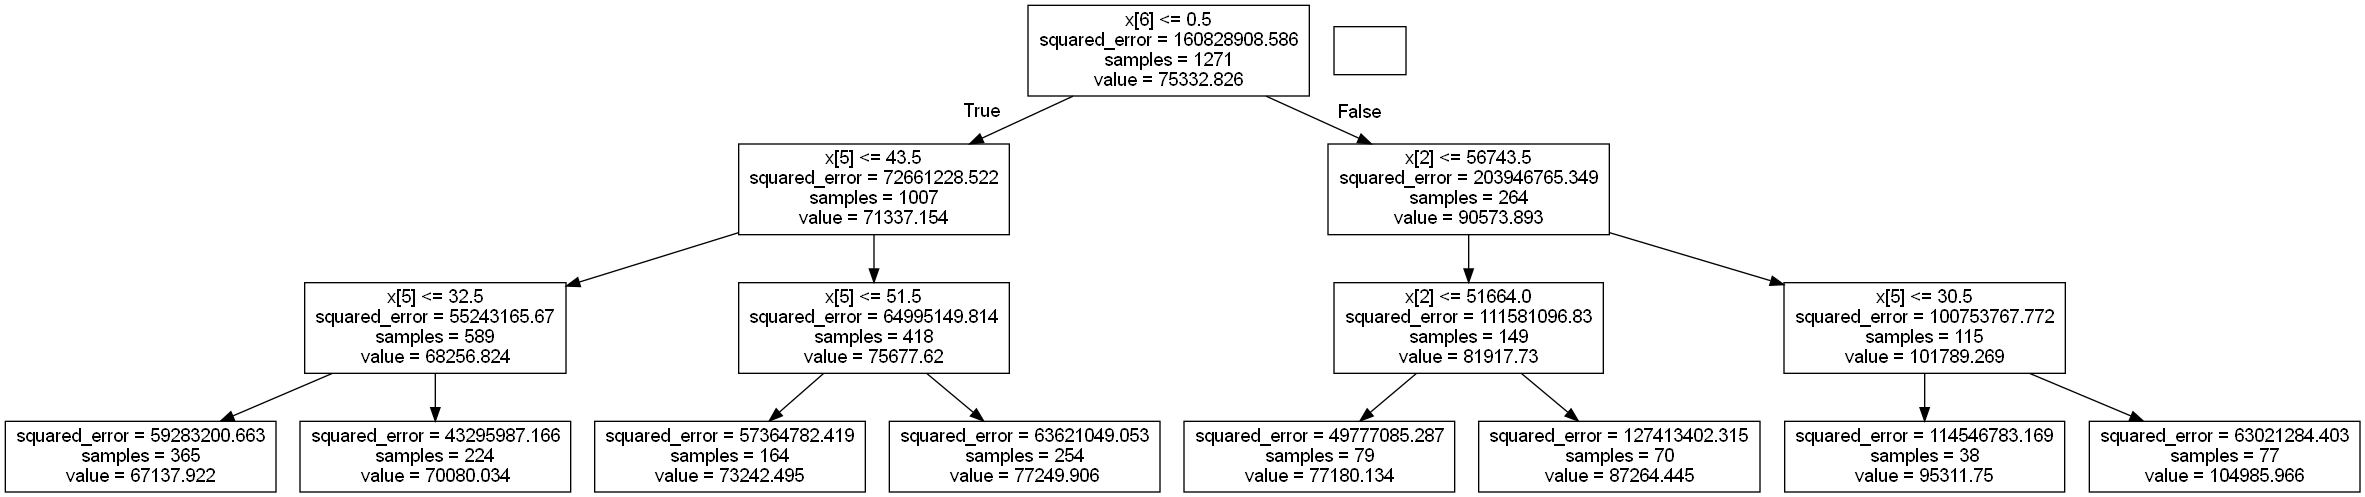

In [365]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

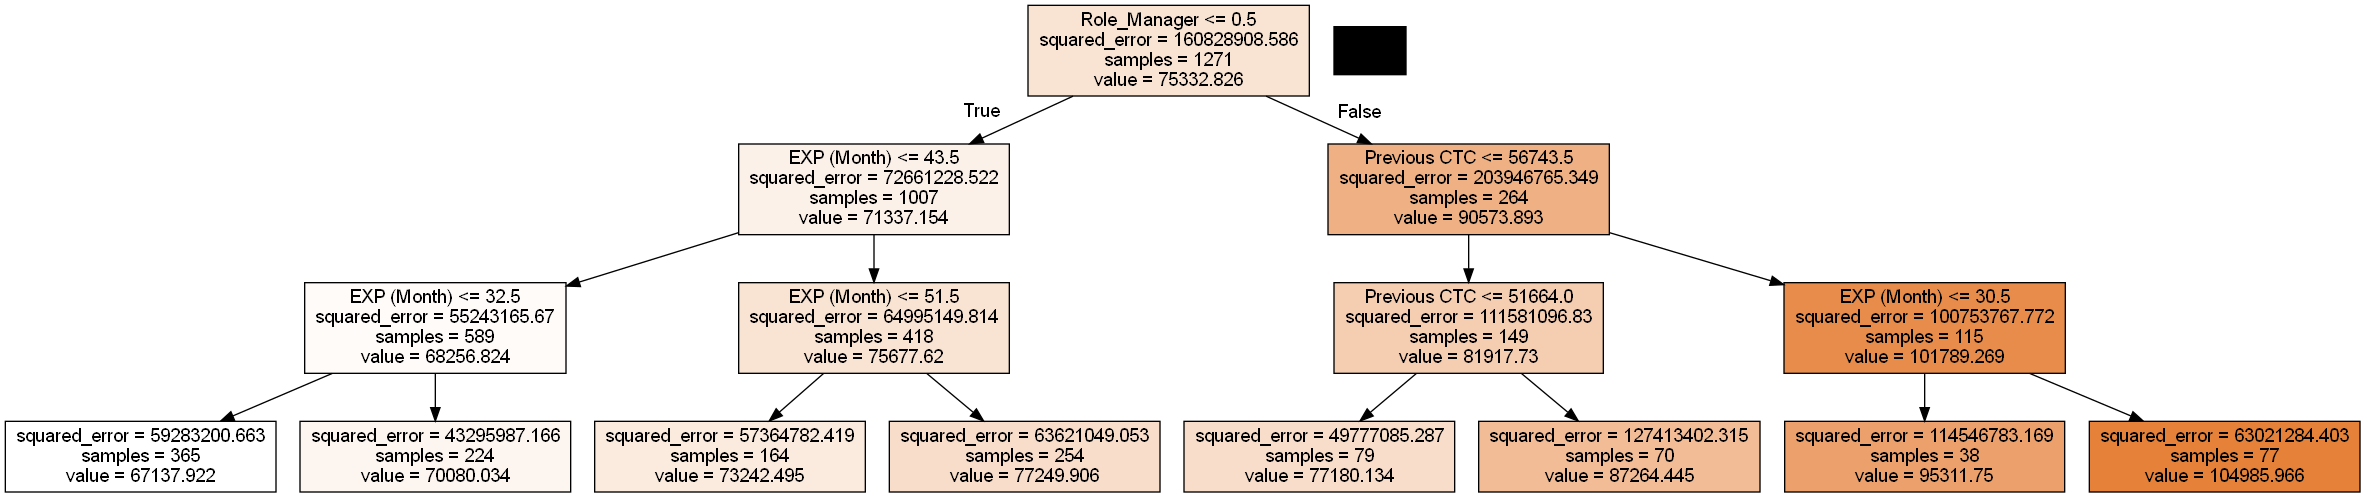

In [366]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(X_train,y_train)
dot_data = tree.export_graphviz(regtree1, out_file = None, feature_names = X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

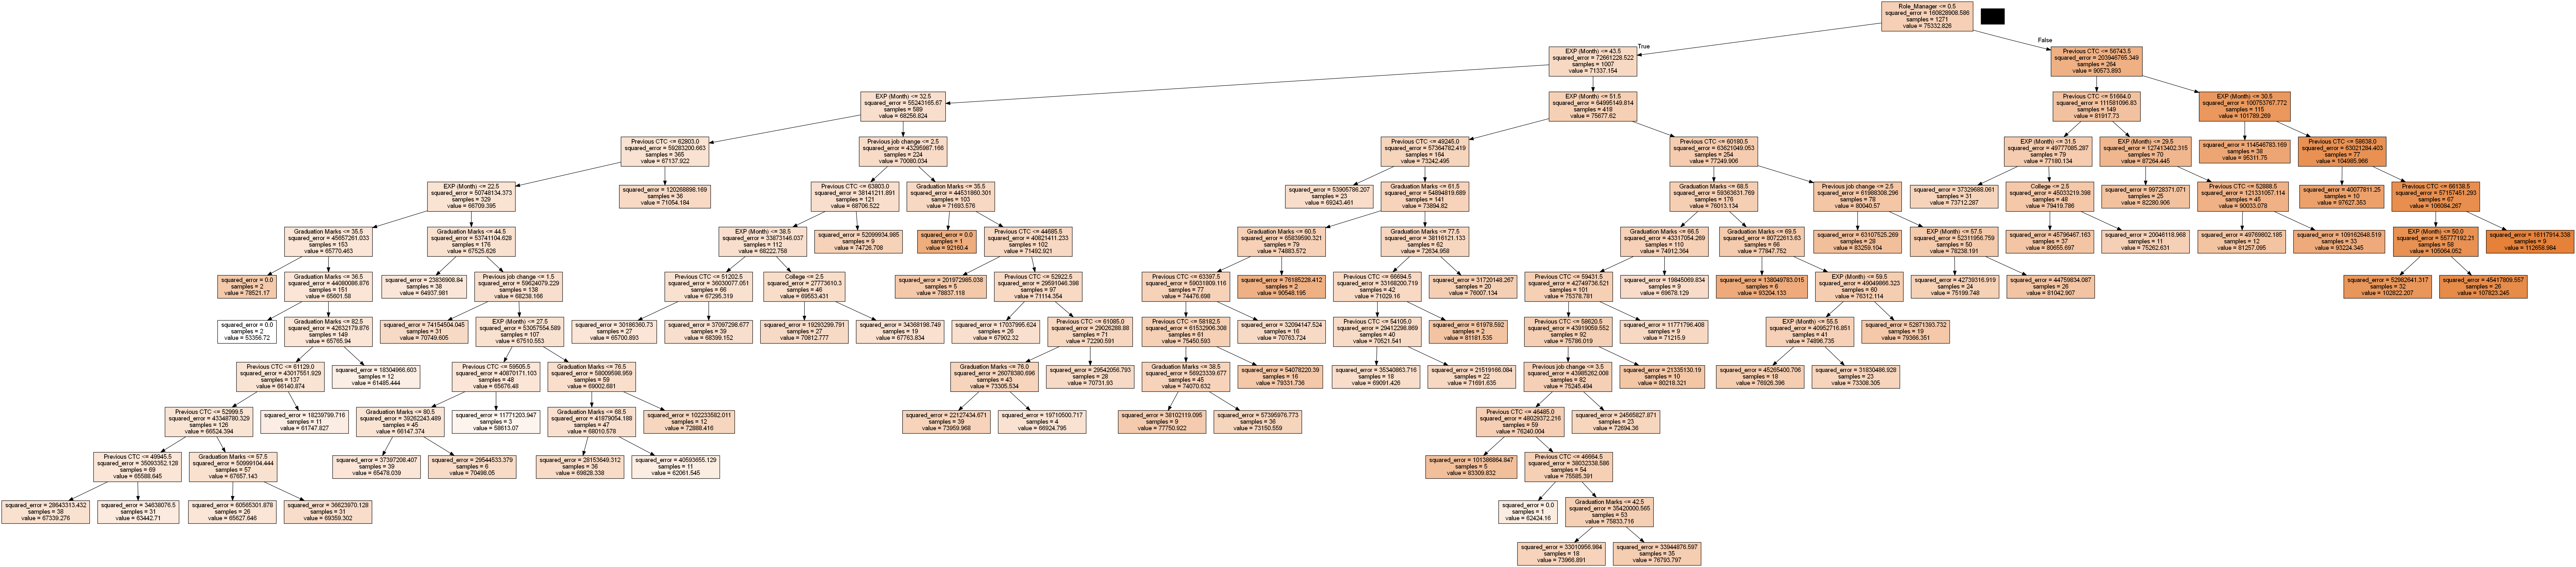

In [367]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 40)
regtree2.fit(X_train,y_train)
dot_data = tree.export_graphviz(regtree2, out_file = None, feature_names = X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

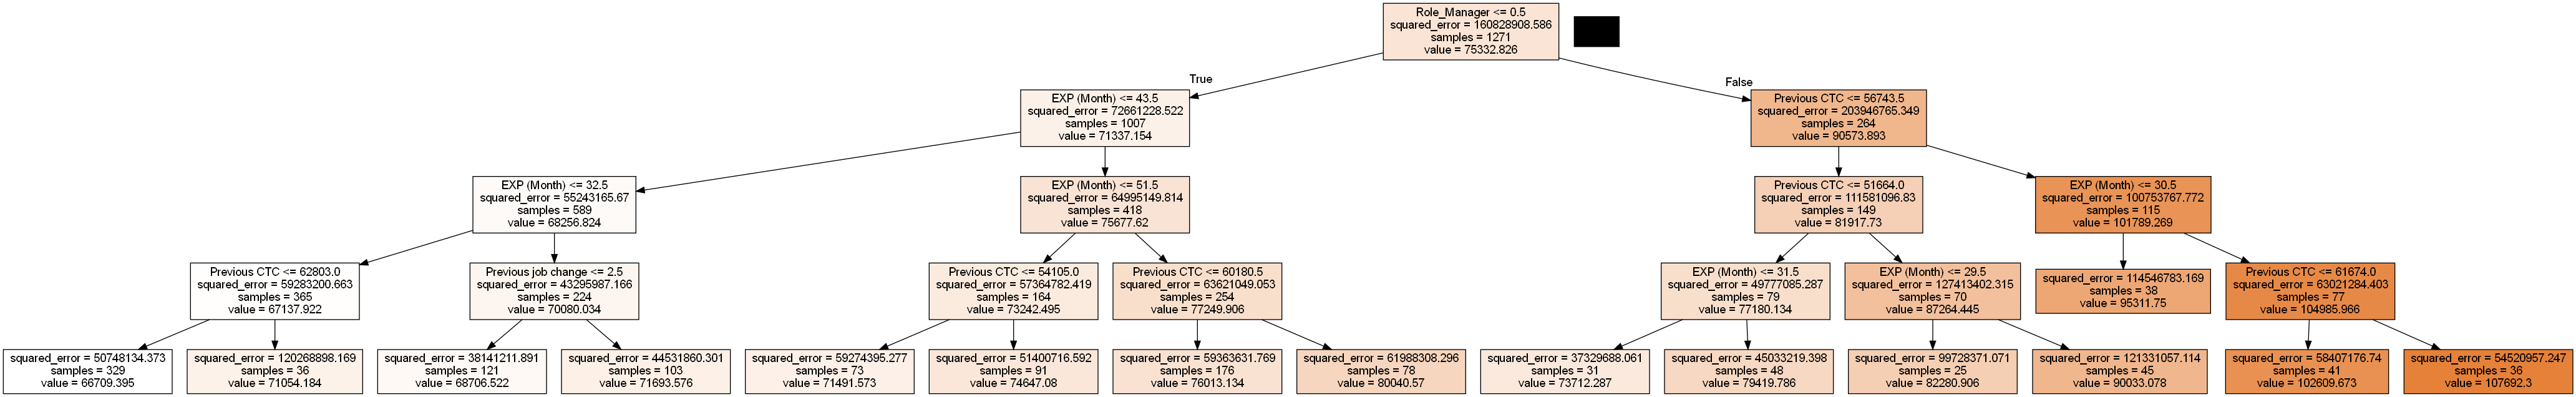

In [368]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth = 4)
regtree3.fit(X_train,y_train)
dot_data = tree.export_graphviz(regtree3, out_file = None, feature_names = X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

## Ensemble Techniques

### Ensemble Technique 1 - "Bagging"

In [369]:
from sklearn import tree
regtree4 = tree.DecisionTreeRegressor(max_depth=5)

In [370]:
from sklearn.ensemble import BaggingRegressor

In [371]:
bag_reg = BaggingRegressor(base_estimator=regtree4, n_estimators = 10, bootstrap = True, n_jobs = -1, random_state = 2)

In [372]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_jobs=-1,
                 random_state=2)

In [373]:
y_train_pred = bag_reg.predict(X_train)
y_test_pred =  bag_reg.predict(X_test)

In [374]:
y_test_pred

array([ 66864.28753408,  66759.45704121,  66696.92719504,  77290.03405335,
        73761.70013534,  84987.89062651,  70407.64861683,  71781.35419398,
        70416.43869281,  74384.51301397,  70071.20837788,  76117.76520251,
        87938.89343201,  76503.97721142,  74339.90335515, 102368.93925215,
        67579.25973155,  68090.15568538,  67930.21336135,  80914.62842937,
        97121.09673027, 104102.78554251,  68391.63578742,  68165.72844419,
        70773.05149849,  67862.40950277,  76144.84532748, 103040.74094812,
        75537.973325  ,  74432.61029286,  66854.5477818 ,  66759.45704121,
        76194.63438793,  80906.50409444,  99414.40399523,  78512.34523821,
        68131.01426582,  73777.724006  ,  65265.79483521,  67607.37643815,
        69887.8657457 ,  76399.28515775,  73868.19543897,  65059.07951579,
        76144.84532748,  66913.5429611 ,  76216.92189065,  67538.29155328,
        67048.64150089,  73761.70013534, 105015.25433582,  73807.68916412,
       102082.70308597,  

In [375]:
mean_squared_error(y_test, y_test_pred)

57498598.23513029

In [376]:
r2_score(y_train, y_train_pred)

0.6916562458054372

In [377]:
r2_score(y_test, y_test_pred)

0.6125024346603687

### Ensemble Technique 2 - "Random Forest"

In [378]:
from sklearn.ensemble import RandomForestRegressor

In [379]:
rf_reg = RandomForestRegressor(n_estimators = 5000, max_depth = 7, n_jobs = -1, random_state=42)

In [380]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=5000, n_jobs=-1,
                      random_state=42)

In [381]:
mean_squared_error(y_test, rf_reg.predict(X_test))

53661324.30461125

In [382]:
r2_score(y_test, rf_reg.predict(X_test))

0.6383627921518125

In [383]:
r2_score(y_train, rf_reg.predict(X_train))

0.7860737487079328

### Ensemble Technique 3 - "Grid Search"

In [384]:
from sklearn.model_selection import GridSearchCV

In [385]:
grid_reg = RandomForestRegressor(n_estimators = 2000, max_depth = 7, random_state = 42)

In [386]:
params_grid = {"max_features" :[2,3,4,5,6,7,8,9], 
               "min_samples_split" : [2,3,4,5]}

In [387]:
grid_search = GridSearchCV(grid_reg, params_grid, n_jobs= -1, cv=5, scoring = 'r2')

In [388]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=2000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='r2')

In [389]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2}

In [390]:
cvrf_reg = grid_search.best_estimator_

In [391]:
mean_squared_error(y_test, cvrf_reg.predict(X_test))

53148903.24733403

In [392]:
r2_score(y_test, cvrf_reg.predict(X_test))

0.6418161269846321

In [393]:
r2_score(y_train, cvrf_reg.predict(X_train))

0.7721443123095588

### Ensemble Technique 4 - "Gradient Boosting"

In [394]:
from sklearn.ensemble import GradientBoostingRegressor

In [395]:
gbc_reg = GradientBoostingRegressor()

In [396]:
gbc_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [397]:
mean_squared_error(y_test, gbc_reg.predict(X_test))

57561836.73112567

In [398]:
r2_score(y_test, gbc_reg.predict(X_test))

0.6120762544753537

In [399]:
r2_score(y_train, gbc_reg.predict(X_train))

0.7256598349946741

In [400]:
gbc_reg2 = GradientBoostingRegressor(learning_rate = 0.01, n_estimators = 1000, max_depth = 3)
gbc_reg2.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)

In [401]:
r2_score(y_test, gbc_reg2.predict(X_test))

0.6097741036680246

In [402]:
r2_score(y_train, gbc_reg2.predict(X_train))

0.7244912559572851

### Ensemble Technique 5 - "Ada Boost"

In [403]:
from sklearn.ensemble import AdaBoostRegressor

In [404]:
ada_reg = AdaBoostRegressor(learning_rate = 0.002, n_estimators = 500)

In [405]:
ada_reg.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.002, n_estimators=500)

In [406]:
r2_score(y_test, ada_reg.predict(X_test))

0.6110371852944037

In [407]:
r2_score(y_train, ada_reg.predict(X_train))

0.6252066495142262

### Ensemble Technique 6 - "XG Boost"

In [408]:
 import xgboost as xgb   

In [409]:
xgb_reg = xgb.XGBRegressor(max_depth=4, n_estimators = 2000, learning_rate = 0.001, n_jobs = -1)

In [410]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [411]:
r2_score(y_test, xgb_reg.predict(X_test))

0.6033225583872417

In [412]:
r2_score(y_train, xgb_reg.predict(X_train))

0.6603180882440185

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

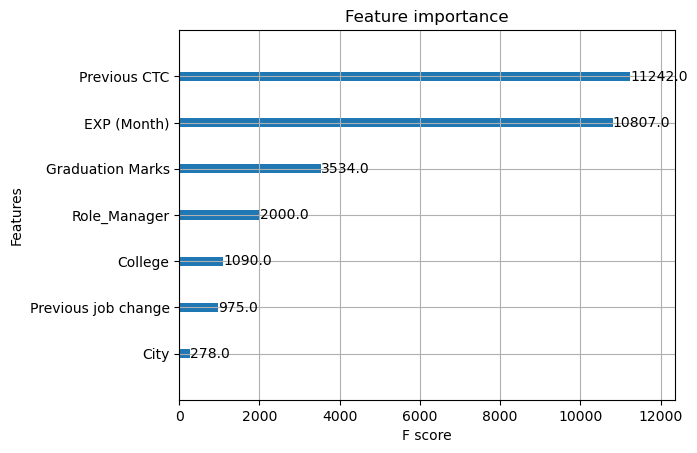

In [413]:
xgb.plot_importance(xgb_reg)

In [414]:
xgb_reg = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.01, random_state = 42)

In [415]:
param_test1 = {
    'max_depth': range(3,10,2),
               'gamma' : [0.1, 0.2, 0.3, 0.4],
                'subsample' : [0.8, 0.9],
                 'colsample_bytree' : [0.8,0.9],
                  'reg_alpha' : [1e-2, 0.1, 1]
}

In [416]:
grid_search = GridSearchCV(xgb_reg, param_test1, n_jobs=-1, cv=5, scoring = 'r2')

In [417]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.01, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='r2')

In [418]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.1,
 'max_depth': 3,
 'reg_alpha': 0.1,
 'subsample': 0.8}

In [419]:
cvxg_reg = grid_search.best_estimator_

In [420]:
r2_score(y_test, cvxg_reg.predict(X_test))

0.6150677749903654

In [421]:
r2_score(y_train, cvxg_reg.predict(X_train))

0.7220189367309328

<center>

##  QUESTIONS

### 1. Your views about the problem statement?

The problem statement requires us to create a machine learning model which will help the company in determining the salary of newly hired employees using the provided data. The problem statement is quite clear and specific, providing a well-defined objective for the task.

As per the statement, it clearly mentions that as a data analyst at TechWorks Consulting, we are given the task of creating a machine learning model which will help them in determining the salary of newly hired employees using the provided data, and thus this objective provides a clear direction for model development and evaluation. We have to define our approach and then perform all the tasks required step by step to make the prediction, and then ultimately perform predictive analysis to predict the salary.

Predicting employee salaries is a common and practical use case for machine learning in HR and recruitment processes. By automating the salary determination process, we can streamline their hiring procedures and ensure fair compensation for new hires. We have been provided sufficient data to train and evaluate the machine learning model.

### 2. What will be your approach to solving this task?

To solve this task, we'll approach it using a Linear Regression model in machine learning. In a Linear Regression model, we need to follow several steps to create an efficient model for determining the salary of newly hired employees.

**Understanding the Problem Statement:**
Our first step in resolving this task will be to understand the given problem statement. We need to have a clear understanding of what we are predicting, what features we have, and the requirements and context of the problem statement.

**Importing Libraries:**
Next, we'll import the necessary libraries into our Jupyter notebook.

**Importing Data:**
We'll import our data from various CSV files to collect the required data.

**Preprocessing Data:**
Preprocessing involves several methods:

- We'll start by checking for any missing values in our data. If there are any missing values, we'll handle them using strategies like imputation.
- After this, we'll check for outliers in our data.
- We'll convert categorical variables into numerical representations that can be used by machine learning algorithms.
- For nominal variables, we'll use one-hot encoding or label encoding.

**Data Analysis:**
Once preprocessing is done, we'll analyze the data to understand its characteristics, explore relationships between variables, and gain insights.

**Splitting the Dataset:**
We'll split the dataset into training and testing sets to assess the model's performance on unseen data.

**Model Building:**
We'll use the training data to fit the linear regression model to the data. Additionally, we'll employ Lasso and Ridge linear regression methods to prevent overfitting. Furthermore, we'll explore decision trees and various ensemble techniques to produce a stronger predictive model. We'll fine-tune any hyperparameters of the model to improve performance using various available ML model options. Finally, we'll select the method which gives us the highest R-squared score.

**Model Evaluation:**
Once satisfied with the model's performance, we can deploy it to make predictions on new data.


### 3. What were the available ML model options you had to perform this task?

We had several ML model options taught in the recorded lectures and I had performed this task on each of these ML options.

**1. Ordinary Least Squares :-** It is a statistical method used to estimate the parameters of a linear regression model by minimizing the sum of the squared differences between the observed and predicted values. It aims to find the line (in the case of simple linear regression) or hyperplane (in the case of multiple linear regression) that best fits the given data points.

**2. Ridge Regression :-** It is a linear regression technique used to mitigate the problem of multicollinearity and overfitting in predictive modeling. It extends the ordinary least squares (OLS) method by adding a penalty term to the loss function, which penalizes large coefficients.

**3. Lasso Regression :-** It is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) method. Lasso Regression is used to perform variable selection and regularization to mitigate overfitting in predictive modeling.

**4. Decision Trees :-** It iss a non-parametric supervised learning algorithm used for both classification and regression tasks. It builds a model in the form of a tree structure by recursively splitting the data into subsets based on the values of input features

**5. Bagging :-** Bagging, short for Bootstrap Aggregating, is a machine learning ensemble technique used to improve the performance and stability of predictive models. It works by training multiple instances of a base learning algorithm (often referred to as base learners) on different subsets of the training data and then combining their predictions to make a final prediction.

**6. Random Forest :-** It is a powerful ensemble learning technique used for both classification and regression tasks in machine learning. It operates by constructing a multitude of decision trees during training and then outputs the average prediction (for regression) or the mode of predictions (for classification) made by the individual trees.

**7. Grid Search (Random Forest) :-** 
Grid search is a hyperparameter tuning technique used in machine learning to find the optimal hyperparameters for a given model and dataset

**8. Gradient Boosting :-** gIt  is a machine learning technique used for supervised learning tasks, such as regression and classification. It belongs to the ensemble learning family of methods, specifically boosting

**9. AdaBoost :-** 
AdaBoost, short for Adaptive Boosting, is a machine learning algorithm that belongs to the family of ensemble methods and is primarily used for classification tasks.

**10. XG Boost :-** 
XGBoost, short for Extreme Gradient Boosting, is a powerful and scalable machine learning library that belongs to the family of gradient boosting algorithms.

### 4. Which model’s performance is best and what could be the possible reason for that?

We performed our task on various ML model options and calculated the R2 scores for each of them to determine which model gives us the best performance.

The R2 scores calculated using the various ML model options are as follows:

| ML Model Option         | R2 Score |
|-------------------------|----------|
| Ordinary Least Squares  |   0.534  |
| Train-Test split        |   0.535  |
| Ridge Regression        |   0.535  |
| Lasso Regression        |   0.536  |
| Train-Test split        |   0.592  |
| Bagging                 |   0.612  |
| Random Forest           |   0.638  |
| Grid Search (Random Forest) | 0.641  |
| Gradient Boosting       |   0.609  |
| AdaBoost                |   0.611  |
| XG Boost                |   0.603  |

The Grid Search (Random Forest) ML model option gave us the best performance as it has the highest R2 score of 0.641 for our test dataset.

There could be several possible factors why the Grid Search (Random Forest) ML model option gave us the best performance.

Firstly, because of hyperparameter optimization, as grid search allows exhaustive hyperparameter tuning, systematically exploring a predefined set of hyperparameters to find the optimal combination that maximizes performance.

Secondly, Random Forest is an ensemble learning technique that combines multiple decision trees to improve predictive performance. It tends to produce robust and accurate predictions, particularly when trained on complex or high-dimensional data. Grid Search helps fine-tune the parameters of Random Forest, enhancing its ability to capture complex patterns in the data.

### 5. What steps can you take to improve this selected model’s performance even further?

We can take several steps to improve the selected model’s performance even further, such as :-

We can continue refining the hyperparameters of the Random Forest model using more granular search spaces.

Experiment with different settings for parameters such as the number of trees, tree depth, minimum samples per leaf, and feature selection methods.

Explore ensemble methods beyond Random Forest, such as Gradient Boosting Machines, AdaBoost, or stacking, and evaluate their performance.

Combine the predictions of multiple models using techniques like model averaging or stacking to improve overall performance.